In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [83]:
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [84]:
pd.set_option('display.max_rows',df.shape[0]+1)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


In [85]:
pd.set_option('display.max_rows',10)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [86]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [87]:
#les elements nuls
df.isnull().sum().sort_values(ascending=False)

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
                     ..
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Length: 14, dtype: int64

In [88]:
#seulement type numerique
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [89]:
df.dtypes

ID                    int64
Age                   int64
Experience            int64
Income                int64
ZIP Code              int64
                      ...  
Personal Loan         int64
Securities Account    int64
CD Account            int64
Online                int64
CreditCard            int64
Length: 14, dtype: object

In [90]:
df['Education'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       2
4       2
       ..
4995    3
4996    1
4997    3
4998    2
4999    1
Name: Education, Length: 5000, dtype: int64>

In [91]:
df['Personal Loan'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64>

In [92]:
df.drop('ID',axis=1,inplace=True)

In [93]:
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [94]:
df['Education'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       2
4       2
       ..
4995    3
4996    1
4997    3
4998    2
4999    1
Name: Education, Length: 5000, dtype: int64>

In [95]:
target=df['Personal Loan']
y=target
target.value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

le pourcentage de credits accordés est : 0.904
le pourcentage de credits non accordés est : 0.096


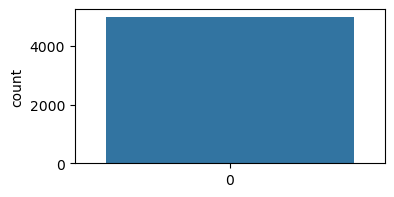

In [96]:
plt.figure(figsize=(4,2))
sns.countplot(target)
yes=target.value_counts()[0]/len(target)
non=target.value_counts()[1]/len(target)
print(f'le pourcentage de credits accordés est : {yes}')
print(f'le pourcentage de credits non accordés est : {non}')

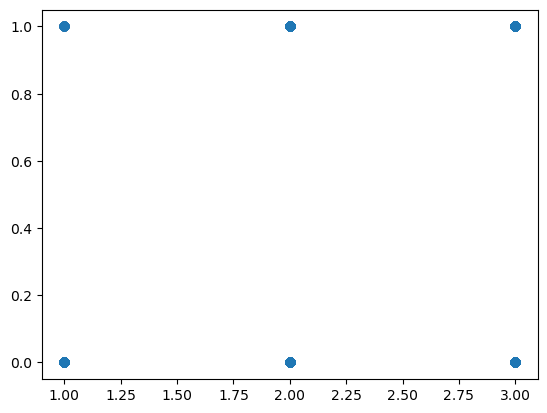

In [97]:
plt.scatter(df['Education'],df['Personal Loan'])

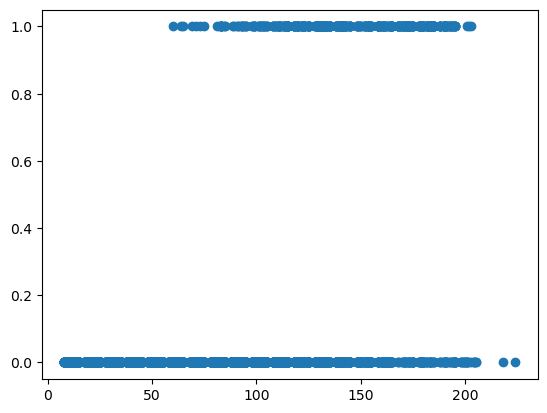

In [98]:
plt.scatter(df['Income'],df['Personal Loan'])

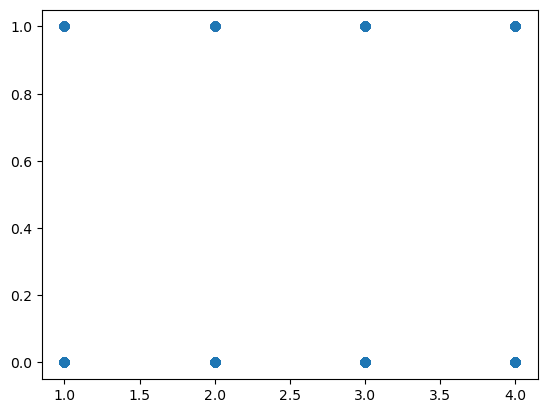

In [99]:
plt.scatter(df['Family'],df['Personal Loan'])

In [100]:
df.groupby('Personal Loan').median()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.0,20.0,59.0,93437.0,2.0,1.4,2.0,0.0,0.0,0.0,1.0,0.0
1,45.0,20.0,142.5,93407.0,3.0,3.8,2.0,0.0,0.0,0.0,1.0,0.0


In [101]:

x=df
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(x, y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print('X_train shape:', X_train.shape)
    print('X_test shape:', X_test.shape)
    print('y_train shape:', y_train.shape)
    print('y_test shape:', y_test.shape)

X_train shape: (4000, 13)
X_test shape: (1000, 13)
y_train shape: (4000,)
y_test shape: (1000,)


In [120]:
# Définir les modèles
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

# Définir la fonction de calcul de précision
def accu(y_true, y_pred, retu=False):
    acc = accuracy_score(y_true, y_pred)
    if retu:
        return acc
    else:
        print(f'La précision du modèle est : {acc}')

# Définir la fonction d'entraînement, de test et d'évaluation des modèles
def train_test_eval(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        print(name, ':')
        model.fit(X_train, y_train)
        accu(y_test, model.predict(X_test))
        print('-' * 30)
train_test_eval(models, X_train, y_train, X_test, y_test)

KNeighborsClassifier :
La précision du modèle est : 0.929
------------------------------
DecisionTreeClassifier :
La précision du modèle est : 0.904
------------------------------
LogisticRegression :
La précision du modèle est : 0.945
------------------------------


In [121]:
X_2=x[['Age','Income','Experience','Family','Education']]

In [122]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X_2, y):
    X_train, X_test = X_2.iloc[train_index], X_2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print('X_train shape:', X_train.shape)
    print('X_test shape:', X_test.shape)
    print('y_train shape:', y_train.shape)
    print('y_test shape:', y_test.shape)

X_train shape: (4000, 5)
X_test shape: (1000, 5)
y_train shape: (4000,)
y_test shape: (1000,)


In [119]:
train_test_eval(models, X_train, y_train, X_test, y_test)

KNeighborsClassifier :
La précision du modèle est : 0.929
------------------------------
DecisionTreeClassifier :
La précision du modèle est : 0.904
------------------------------
LogisticRegression :
La précision du modèle est : 0.945
------------------------------


In [123]:
Classifier =LogisticRegression()
Classifier.fit(X_2,y)

LogisticRegression()

In [125]:
#pour enregister  le modele 
pickle.dump(Classifier,open('model.pkl','wb'))

In [126]:
from IPython.display import FileLink

# Créer un lien de téléchargement pour le fichier 'model.pkl'
FileLink(r'model.pkl')


C:\Users\dorra\model.pkl